In [40]:
%matplotlib inline
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [41]:
#Creamos el data frame con la informacion de google maps
data = pd.read_csv('https://raw.githubusercontent.com/emmanuelvazc/My-sites-Google-Maps/master/Historial_Ubicaciones2019-2.csv',header=0)

In [42]:
#Revisamos la estructura del data frame
data.head()

,Fecha,Coord
0,2019-01-01,-89.6015828 20.9917451 -1
1,2019-01-01,-89.6015828 20.9917451 -1
2,2019-01-01,-89.6016231 20.9917673 -1
3,2019-01-01,-89.6016231 20.9917673 -1
4,2019-01-01,-89.6016231 20.9917673 -1


In [43]:
#Asignamos a la variable fecha el formato "datetime"
data['Fecha'] = pd.to_datetime(data['Fecha'])

In [44]:
data_fecha = data.set_index('Fecha')

In [45]:
#Creamos los filtros para los últimos 10 días
fecha_filtro1 = data['Fecha'].max() - dt.timedelta(days=9)
fecha_filtro2 = data['Fecha'].max()

In [46]:
#filtramos el dataframe
data_filter = data_fecha.loc[fecha_filtro1:fecha_filtro2]

In [47]:
#Creamos un groupby con la columna Coord para mostrar la frecuencia de esta
data_filter = data.set_index(['Coord'])
df = data_filter.groupby(['Coord']).count()
df2 = df.groupby(level='Coord').filter(lambda grp: (grp > 30).all())

In [48]:
#Ordenamos los valores del mayor al menor
df2=df2.sort_values('Fecha',ascending=False).head(20)

<Figure size 864x432 with 0 Axes>

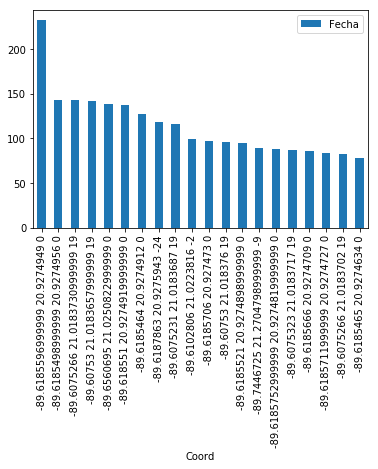

In [49]:
#Creamos un grafico de barras para observar las coordenadas con más frecuencia
#Basta con esta gráfica ya que solo queremos ver las frecuencias
plt.figure(figsize= (12,6))
df2.plot(kind='bar')

In [50]:
df2.head(10)

,Fecha
Coord,
-89.6185596999999 20.9274949 0,232
-89.6185498999999 20.9274956 0,143
-89.6075266 21.0183730999999 19,143
-89.60753 21.0183657999999 19,142
-89.6560695 21.0250822999999 0,138
-89.618551 20.9274919999999 0,137
-89.6185464 20.9274912 0,127
-89.6187863 20.9275943 -24,118
-89.6075231 21.0183687 19,116
